# Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
from sklearn.model_selection import train_test_split

# Load the data

In [11]:
data = pd.read_csv('games.csv')

# Explore the data

In [12]:
data

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


In [13]:
print(data.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [14]:
print(data.shape)

(81312, 20)


Make a histogram of all the ratings in the average_rating column

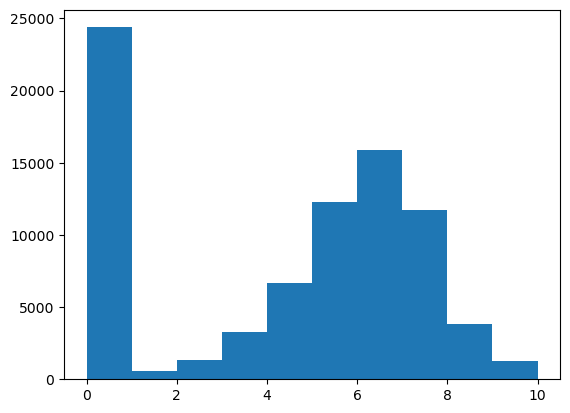

In [16]:
plt.hist(data['average_rating'])
plt.show()

Print first row of all the games with rating of zero

In [21]:
print(data[data['average_rating'] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object


In [19]:
print(data[data['average_rating'] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime                         180.0
minplaytime                         180.0
maxplaytime                         180.0
minage                               13.0
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


Remove rows without user reviews

In [22]:
data = data[data['users_rated'] > 0]

Remove rows with missing values

In [23]:
data = data.dropna(axis = 0)

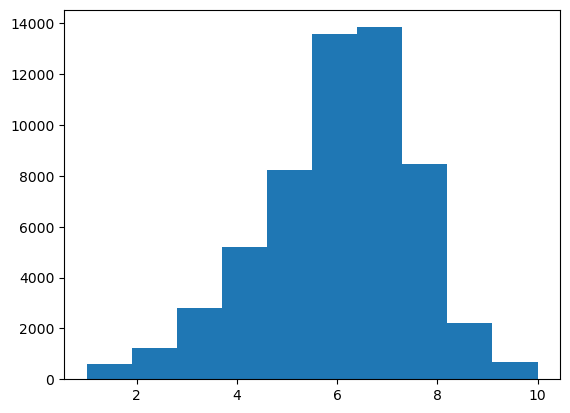

In [25]:
plt.hist(data['average_rating'])
plt.show()

In [26]:
print(data.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


# Correlation matrix

C:\Users\anirudh.dhagate\AppData\Local\Temp\ipykernel_12160\4117644968.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


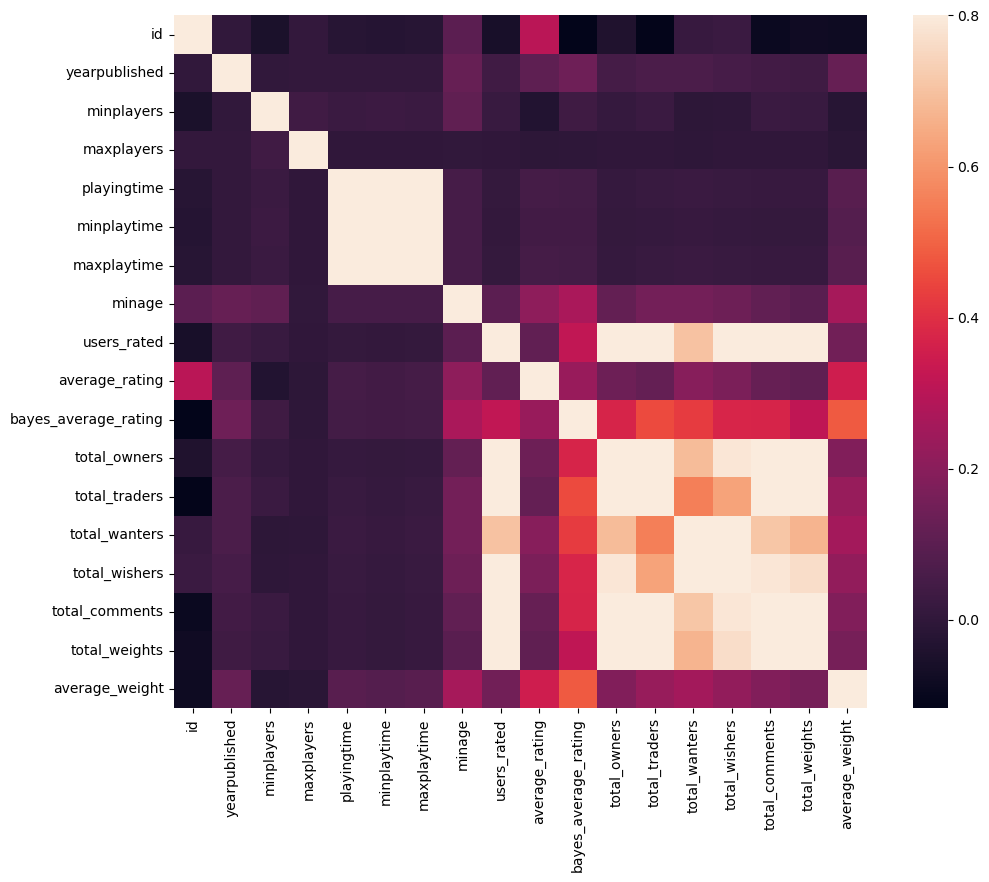

In [29]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Filtering the columns

In [30]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]

In [31]:
columns

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [32]:
target = 'average_rating'

In [35]:
train = data.sample(frac=0.8, random_state=1)

test = data.loc[~data.index.isin(train.index)]

print(train.shape, test.shape)

(45515, 20) (11379, 20)


Importing models

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize model class
lr = LinearRegression()
lr.fit(train[columns], train[target])

LinearRegression()

In [37]:
# Generating the predictions for the test set

predictions = lr.predict(test[columns])

# Compute error between predicted and actual values

mean_squared_error(predictions, test[target])

2.0788190326293248

In [41]:
X = data[columns]
y = data[target]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = regressor.predict(X_test)

In [55]:
mean_squared_error(y_pred, y_test)

2.0878654278597404

Importing the random forest model

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

# fit data

rf_regressor.fit(train[columns], train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [67]:
# make predictions
predictions = rf_regressor.predict(test[columns])

# compute error
mean_squared_error(predictions, test[target])

1.4458625791207198

In [72]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [84]:
rating_lr = lr.predict(test[columns].iloc[0].values.reshape(1, -1))
rating_rfr = rf_regressor.predict(test[columns].iloc[0].values.reshape(1, -1))

print("Linear Regression Rating: ", rating_lr[0])
print("Random Forest Regression Rating: ", rating_rfr[0])
print("Actual Rating: ", test[target].iloc[0])

Linear Regression Rating:  8.120612830016654
Random Forest Regression Rating:  7.913735808586182
Actual Rating:  8.07933


C:\Users\anirudh.dhagate\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\anirudh.dhagate\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
